In [ ]:
import pandas as pd

data = pd.read_csv("heart_disease.csv")

In [ ]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [ ]:
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

descriptive_stats = {}
for var in continuous_vars:
    mean_val = data[var].mean()
    std_val = data[var].std()
    descriptive_stats[var] = f"{mean_val:.2f} ± {std_val:.2f}"

descriptive_data = pd.DataFrame(list(descriptive_stats.items()), columns=["Variable", "Mean ± SD"])

print(descriptive_data)

   Variable       Mean ± SD
0       age    54.44 ± 9.04
1  trestbps  131.69 ± 17.60
2      chol  246.69 ± 51.78
3   thalach  149.61 ± 22.88
4   oldpeak     1.04 ± 1.16


In [ ]:
import itertools
from scipy.stats import pearsonr


correlation_results = []


for var1, var2 in itertools.combinations(continuous_vars, 2):
    corr_coef, p_value = pearsonr(data[var1], data[var2])
    correlation_results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Pearson Correlation': round(corr_coef, 4),
        'P-value': round(p_value, 4)
    })

# Convert result to a DataFrame
correlation_data = pd.DataFrame(correlation_results)

# Display the correlation table
print(correlation_data)


  Variable 1 Variable 2  Pearson Correlation  P-value
0        age   trestbps               0.2849   0.0000
1        age       chol               0.2090   0.0002
2        age    thalach              -0.3938   0.0000
3        age    oldpeak               0.2038   0.0004
4   trestbps       chol               0.1301   0.0235
5   trestbps    thalach              -0.0454   0.4315
6   trestbps    oldpeak               0.1892   0.0009
7       chol    thalach              -0.0034   0.9526
8       chol    oldpeak               0.0466   0.4193
9    thalach    oldpeak              -0.3431   0.0000


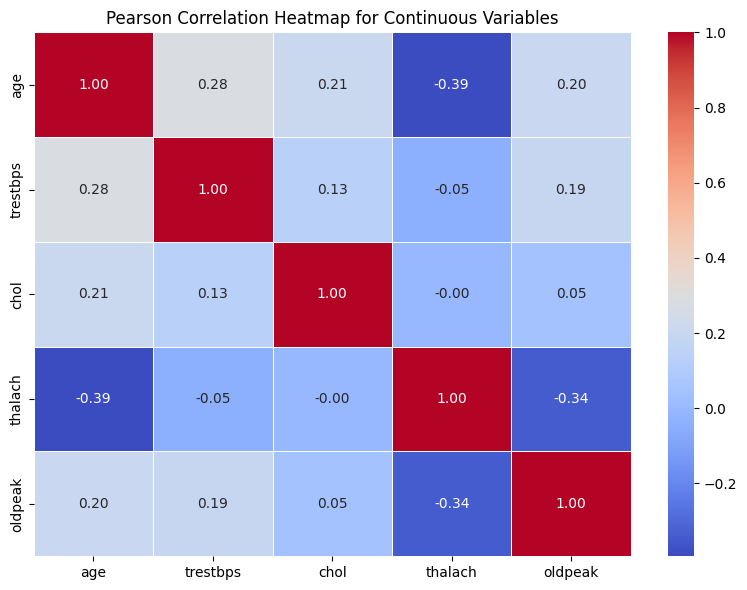

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Select only continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df = data[continuous_vars]

# Compute correlation matrix
corr_matrix = df.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap for Continuous Variables")
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import pointbiserialr

# Define continuous variables and binary target variable
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target_var = 'target'

# Store results
correlation_results = []

# Compute point-biserial correlation for each variable with the target
for var in continuous_vars:
    corr_coef, p_value = pointbiserialr(data[target_var], data[var])
    correlation_results.append({
        'Variable': var,
        'Correlation with Target': round(corr_coef, 4),
        'P-value': round(p_value, 4)
    })

# Convert to DataFrame and displayD6nfpgdJULWivdfuvdnZDY78XT1iHZyuR1vzQywRqPWU
correlation_data = pd.DataFrame(correlation_results)
print(correlation_data)


   Variable  Correlation with Target  P-value
0       age                   0.2231   0.0001
1  trestbps                   0.1508   0.0085
2      chol                   0.0852   0.1391
3   thalach                  -0.4172   0.0000
4   oldpeak                   0.4245   0.0000


/tmp/ipython-input-346290738.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variable', y='Correlation', data=corr_data, palette='coolwarm')


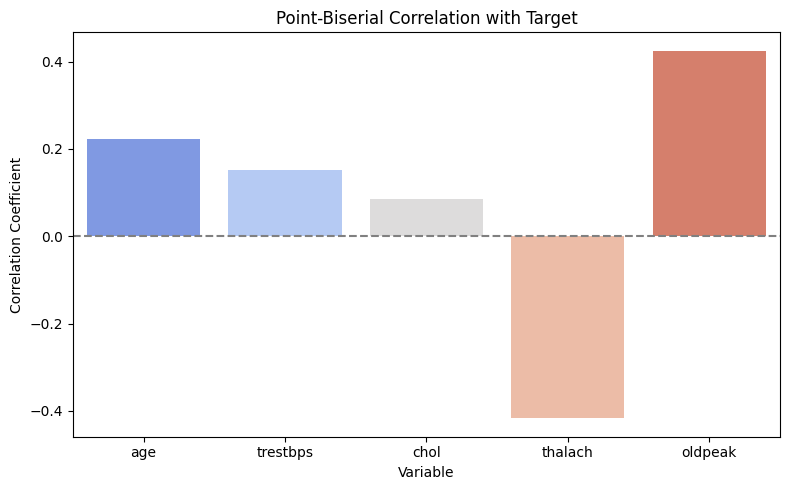

In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns


# Continuous variables and target
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target_var = 'target'

# Calculate point-biserial correlation
results = []
for var in continuous_vars:
    corr, p = pointbiserialr(data[target_var], data[var])
    results.append({'Variable': var, 'Correlation': corr, 'P-value': p})

# Convert to DataFrame
corr_data = pd.DataFrame(results)

# Round values for display
corr_data['Correlation'] = corr_data['Correlation'].round(3)
corr_data['P-value'] = corr_data['P-value'].round(4)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Variable', y='Correlation', data=corr_data, palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Point-Biserial Correlation with Target')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show();


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("heart_disease.csv")

# Assign column names
data.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Replace '?' with 0 and convert to numeric
data.replace('?', 0, inplace=True)
data = data.apply(pd.to_numeric)


In [ ]:
from scipy.stats import ttest_ind

# Age vs Target
t_age = ttest_ind(data[data['target'] == 0]['age'], data[data['target'] == 1]['age'], equal_var=False)

# Resting Blood Pressure vs Target
t_bp = ttest_ind(data[data['target'] == 0]['trestbps'], data[data['target'] == 1]['trestbps'], equal_var=False)

print("T-test for Age:", t_age)
print("T-test for Resting BP:", t_bp)


T-test for Age: TtestResult(statistic=np.float64(-4.0303470663221095), pvalue=np.float64(7.061439075547293e-05), df=np.float64(300.933900948868))
T-test for Resting BP: TtestResult(statistic=np.float64(-2.615233002327402), pvalue=np.float64(0.009409469224173054), df=np.float64(274.6448147673724))


In [ ]:
from scipy.stats import chi2_contingency

# Sex vs Target
chi_sex = chi2_contingency(pd.crosstab(data['sex'], data['target']))

# Chest Pain Type vs Target
chi_cp = chi2_contingency(pd.crosstab(data['cp'], data['target']))

# Fasting Blood Sugar vs Target
chi_fbs = chi2_contingency(pd.crosstab(data['fbs'], data['target']))

print("Chi-square: Sex vs Target", chi_sex)
print("Chi-square: CP vs Target", chi_cp)
print("Chi-square: FBS vs Target", chi_fbs)


Chi-square: Sex vs Target Chi2ContingencyResult(statistic=np.float64(22.042560606155472), pvalue=np.float64(2.666712348180942e-06), dof=1, expected_freq=array([[ 52.50165017,  44.49834983],
       [111.49834983,  94.50165017]]))
Chi-square: CP vs Target Chi2ContingencyResult(statistic=np.float64(81.81577027653815), pvalue=np.float64(1.2517106007837527e-17), dof=3, expected_freq=array([[12.44884488, 10.55115512],
       [27.06270627, 22.93729373],
       [46.54785479, 39.45214521],
       [77.94059406, 66.05940594]]))
Chi-square: FBS vs Target Chi2ContingencyResult(statistic=np.float64(0.07709504829488663), pvalue=np.float64(0.7812734067063785), dof=1, expected_freq=array([[139.64356436, 118.35643564],
       [ 24.35643564,  20.64356436]]))


In [ ]:
from scipy.stats import f_oneway

# Group ages by chest pain type
age_groups = [data[data['cp'] == cp]['age'] for cp in sorted(data['cp'].unique())]

# Run ANOVA
anova_cp = f_oneway(*age_groups)
print("ANOVA: Age by Chest Pain Type", anova_cp)


ANOVA: Age by Chest Pain Type F_onewayResult(statistic=np.float64(3.363527800130519), pvalue=np.float64(0.01907804944707371))


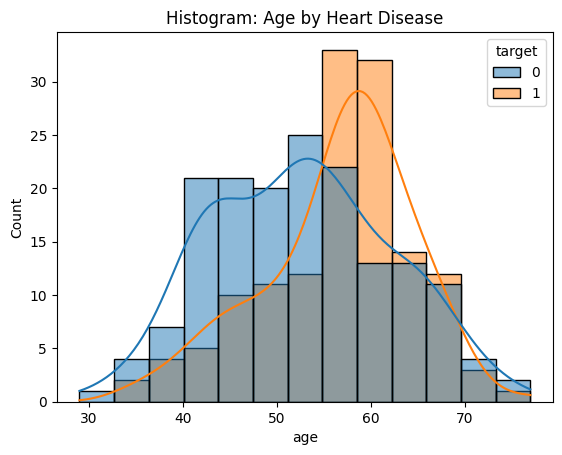

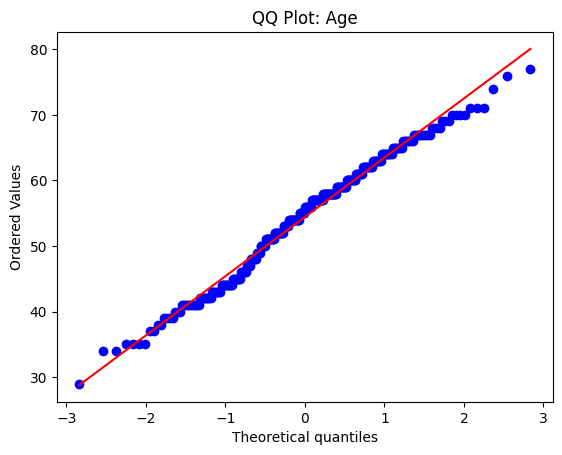

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogram of Age by Target
sns.histplot(data=data, x='age', hue='target', kde=True)
plt.title("Histogram: Age by Heart Disease")
plt.show()

# QQ plot for Age (Optional)
stats.probplot(data['age'], dist="norm", plot=plt)
plt.title("QQ Plot: Age")
plt.show()


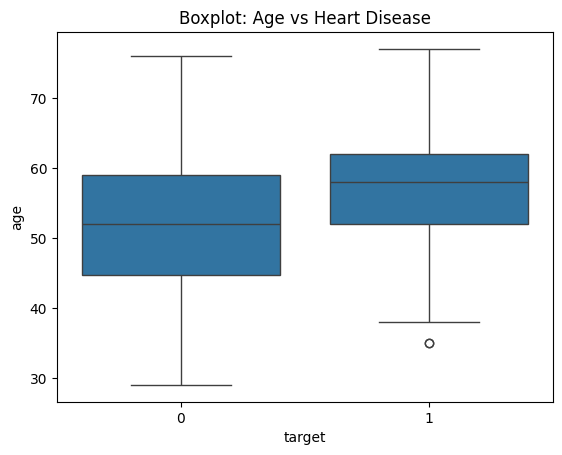

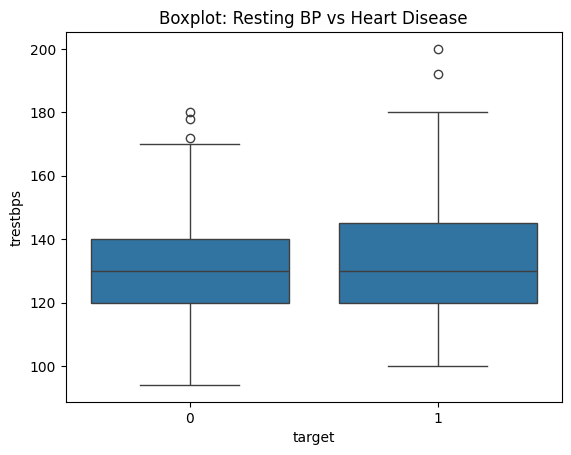

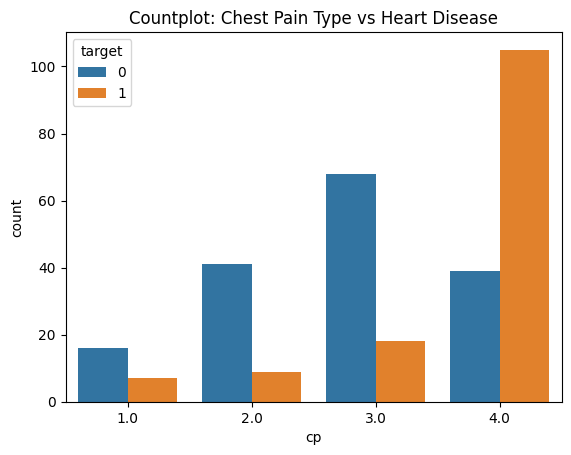

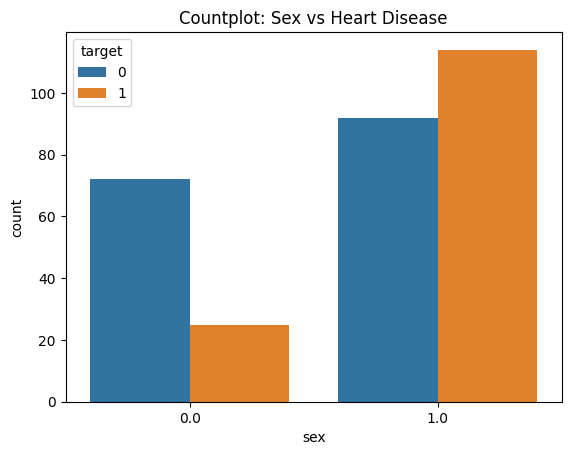

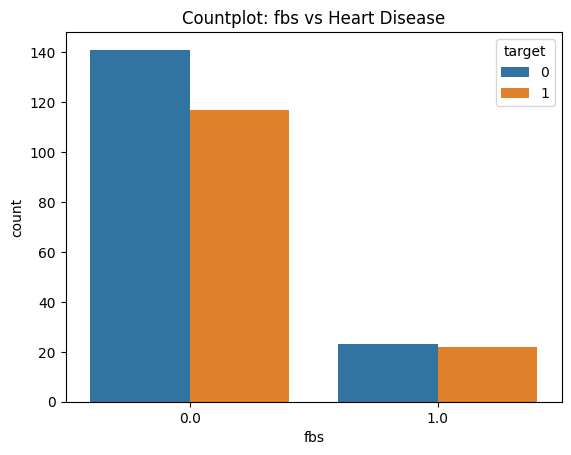

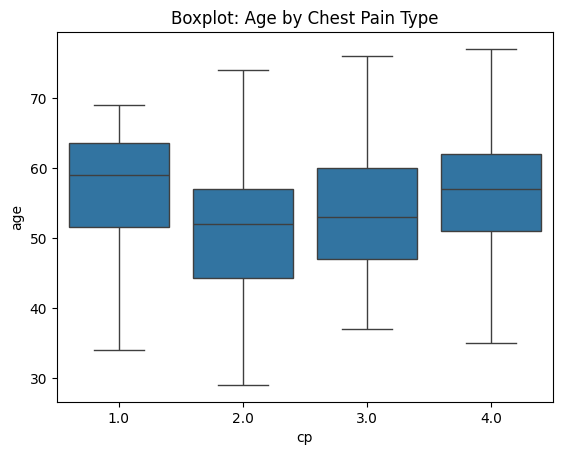

In [ ]:
# Boxplot of Age by Target
sns.boxplot(x='target', y='age', data=data)
plt.title("Boxplot: Age vs Heart Disease")
plt.show()

# Boxplot of Resting BP by Target
sns.boxplot(x='target', y='trestbps', data=data)
plt.title("Boxplot: Resting BP vs Heart Disease")
plt.show()

# Countplot of Chest Pain by Target
sns.countplot(x='cp', hue='target', data=data)
plt.title("Countplot: Chest Pain Type vs Heart Disease")
plt.show()

# Countplot of Sex by Target
sns.countplot(x='sex', hue='target', data=data)
plt.title("Countplot: Sex vs Heart Disease")
plt.show()

# Countplot of fbs by Target
sns.countplot(x='fbs', hue='target', data=data)
plt.title("Countplot: fbs vs Heart Disease")
plt.show()

# Boxplot of Age by Chest Pain Type
sns.boxplot(x='cp', y='age', data=data)
plt.title("Boxplot: Age by Chest Pain Type")
plt.show()


In [ ]:
from scipy.stats import shapiro

# Age for target = 0
shapiro_age_0 = shapiro(data[data['target'] == 0]['age'])
print("Shapiro Age (No Heart Disease):", shapiro_age_0)

# Age for target = 1
shapiro_age_1 = shapiro(data[data['target'] == 1]['age'])
print("Shapiro Age (Heart Disease):", shapiro_age_1)


Shapiro Age (No Heart Disease): ShapiroResult(statistic=np.float64(0.9870022881735246), pvalue=np.float64(0.13204096848016006))
Shapiro Age (Heart Disease): ShapiroResult(statistic=np.float64(0.9677354882130366), pvalue=np.float64(0.0022558384966278634))


In [ ]:
from scipy.stats import levene

# Levene's test for Age between Target groups (0 vs 1)
levene_age = levene(data[data['target'] == 0]['age'], data[data['target'] == 1]['age'])
print("Levene’s Test for Age:", levene_age)

# Levene's test for Resting BP between Target groups (0 vs 1)
levene_bp = levene(data[data['target'] == 0]['trestbps'], data[data['target'] == 1]['trestbps'])
print("Levene’s Test for Resting BP:", levene_bp)

# Levene's test for Age across Chest Pain Types (for ANOVA assumption)
groups_cp = [data[data['cp'] == cp]['age'] for cp in sorted(data['cp'].unique())]
levene_cp = levene(*groups_cp)
print("Levene’s Test for Age by Chest Pain Type (ANOVA):", levene_cp)


Levene’s Test for Age: LeveneResult(statistic=np.float64(7.935920098993705), pvalue=np.float64(0.0051667349340750405))
Levene’s Test for Resting BP: LeveneResult(statistic=np.float64(2.0002001425877736), pvalue=np.float64(0.15831196426971206))
Levene’s Test for Age by Chest Pain Type (ANOVA): LeveneResult(statistic=np.float64(1.0302960649798427), pvalue=np.float64(0.3794316254557488))


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -4.5096  0.189 -10.3251  1.306  False
   1.0    3.0  -2.1719 0.7287  -7.5904 3.2466  False
   1.0    4.0  -0.1473 0.9999  -5.3305 5.0358  False
   2.0    3.0   2.3377 0.4562  -1.7673 6.4427  False
   2.0    4.0   4.3622 0.0167   0.5733 8.1511   True
   3.0    4.0   2.0245 0.3453  -1.1211 5.1702  False
----------------------------------------------------


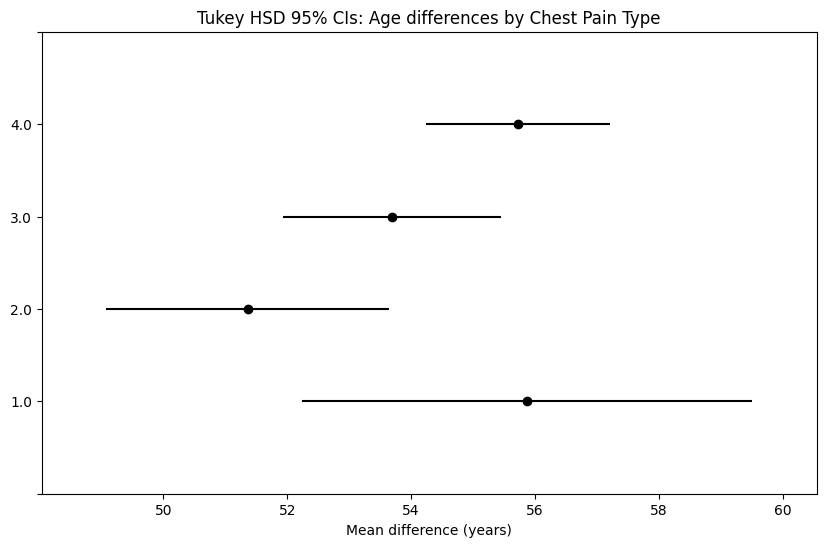

In [ ]:
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

# Create the MultiComparison object (positional arguments, no keywords)
mc = MultiComparison(data['age'], data['cp'])

# Run Tukey HSD
tukey = mc.tukeyhsd(alpha=0.05)

# Print results
print(tukey.summary())

# Plot Tukey HSD confidence intervals
tukey.plot_simultaneous()
plt.title("Tukey HSD 95% CIs: Age differences by Chest Pain Type")
plt.xlabel("Mean difference (years)")
plt.show()



Tukey HSD Results Table:
   group1  group2  meandiff   p-adj    lower   upper  reject
0     1.0     2.0   -4.5096  0.1890 -10.3251  1.3060   False
1     1.0     3.0   -2.1719  0.7287  -7.5904  3.2466   False
2     1.0     4.0   -0.1473  0.9999  -5.3305  5.0358   False
3     2.0     3.0    2.3377  0.4562  -1.7673  6.4427   False
4     2.0     4.0    4.3622  0.0167   0.5733  8.1511    True
5     3.0     4.0    2.0245  0.3453  -1.1211  5.1702   False


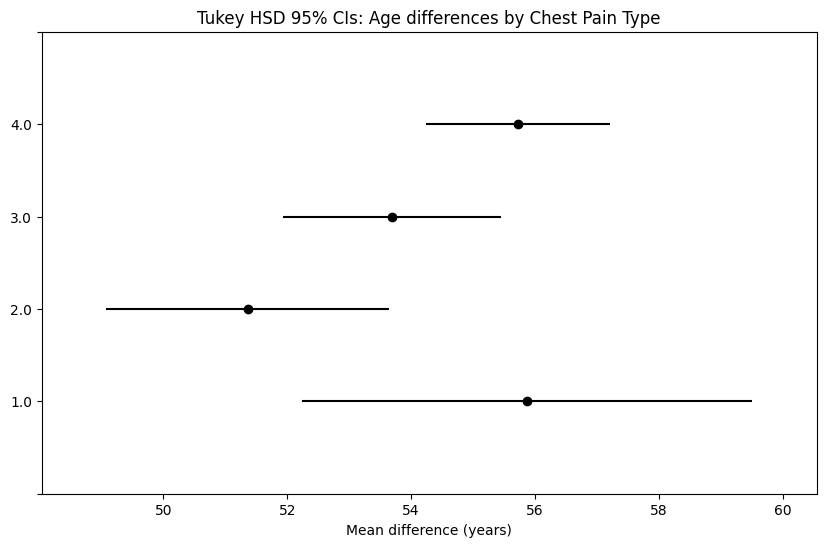

In [ ]:
import pandas as pd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

# --- Tukey HSD Post-hoc test ---
mc = MultiComparison(data['age'], data['cp'])
tukey = mc.tukeyhsd(alpha=0.05)

# Convert Tukey results into a clean DataFrame
tukey_data = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

# Save to CSV (optional)
tukey_data.to_csv("tukey_age_cp_results.csv", index=False)

print("\nTukey HSD Results Table:")
print(tukey_data)

# --- Plot Confidence Intervals ---
tukey.plot_simultaneous()
plt.title("Tukey HSD 95% CIs: Age differences by Chest Pain Type")
plt.xlabel("Mean difference (years)")
plt.show()


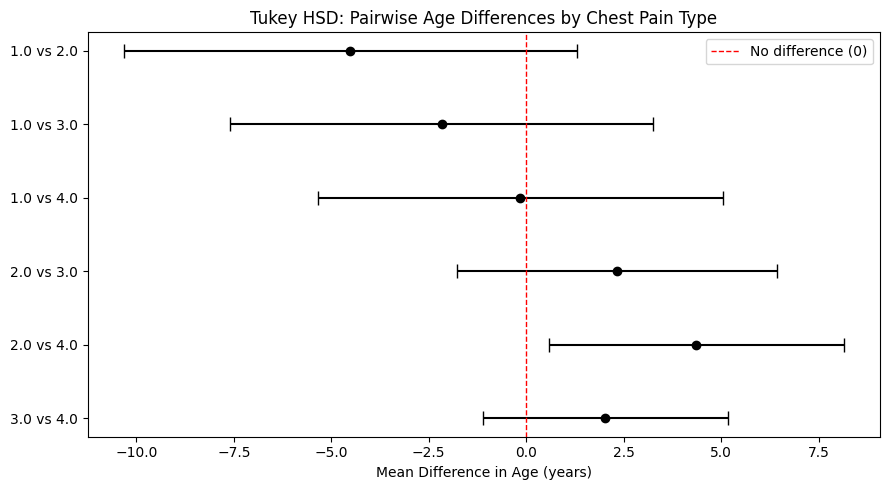

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison

# --- Tukey on your data ---
mc = MultiComparison(data['age'], data['cp'])
tukey = mc.tukeyhsd(alpha=0.05)

# Convert summary to DataFrame
tukey_data = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])

# Ensure numeric types (fixes the UFuncTypeError)
for col in ['meandiff', 'lower', 'upper', 'p-adj']:
    tukey_data[col] = pd.to_numeric(tukey_data[col], errors='coerce')


# Build arrays for plotting
x = tukey_data['meandiff'].to_numpy(dtype=float)
lower = tukey_data['lower'].to_numpy(dtype=float)
upper = tukey_data['upper'].to_numpy(dtype=float)

# xerr needs shape (2, N): [distance to lower, distance to upper]
xerr = np.vstack([x - lower, upper - x])

y = np.arange(len(tukey_data))

# Labels like "1 vs 4"
yticklabels = (tukey_data['group1'].astype(str) + " vs " + tukey_data['group2'].astype(str)).tolist()

# --- Plot mean differences with 95% CIs ---
fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(x, y, xerr=xerr, fmt='o', color='black', capsize=5)

# Zero line (no difference)
ax.axvline(0, color='red', linestyle='--', linewidth=1, label='No difference (0)')

ax.set_yticks(y)
ax.set_yticklabels(yticklabels)
ax.set_xlabel('Mean Difference in Age (years)')
ax.set_title('Tukey HSD: Pairwise Age Differences by Chest Pain Type')
ax.invert_yaxis()
ax.legend()
plt.tight_layout()
plt.show()


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
target
0    164
1    139
Name: count, dtype: int64

=== Test Set Performance ===
                Model                                         BestParams  \
0                 KNN  {'clf__n_neighbors': 9, 'clf__weights': 'dista...   
1  LogisticRegression  {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__so...   
2                 SVM  {'clf__C': 1, 'clf__gamma

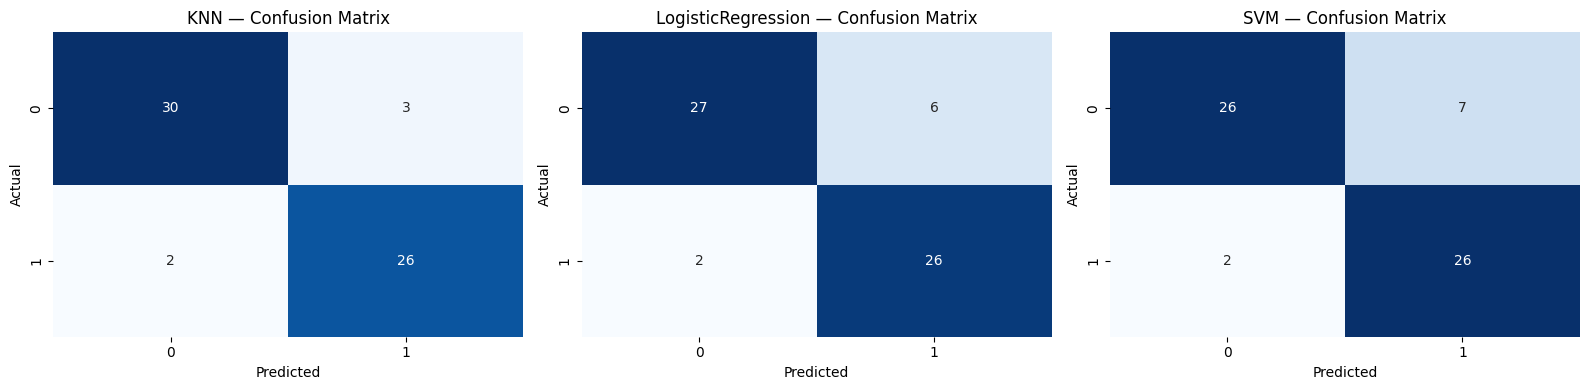

<Figure size 800x600 with 0 Axes>

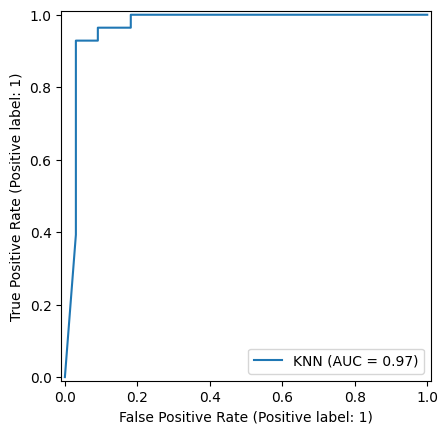

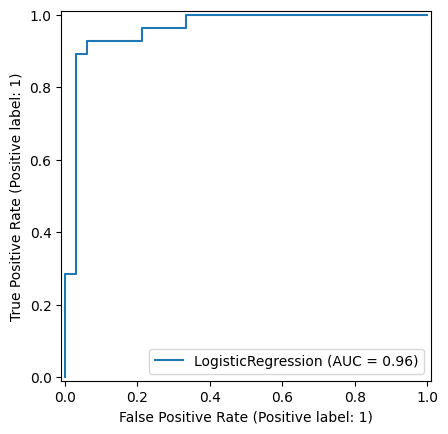

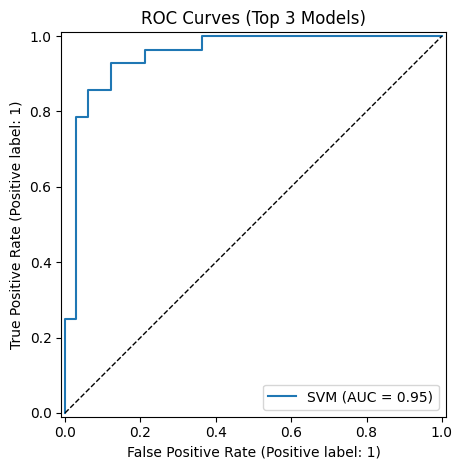

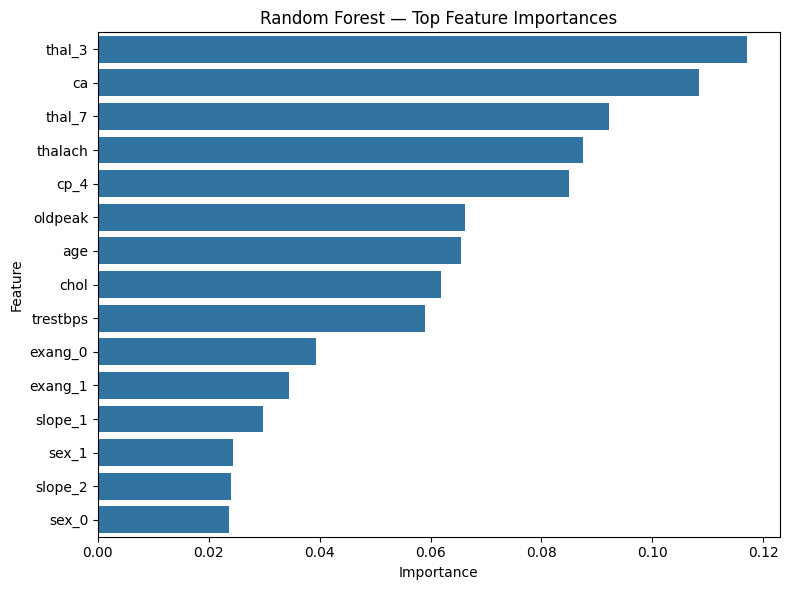

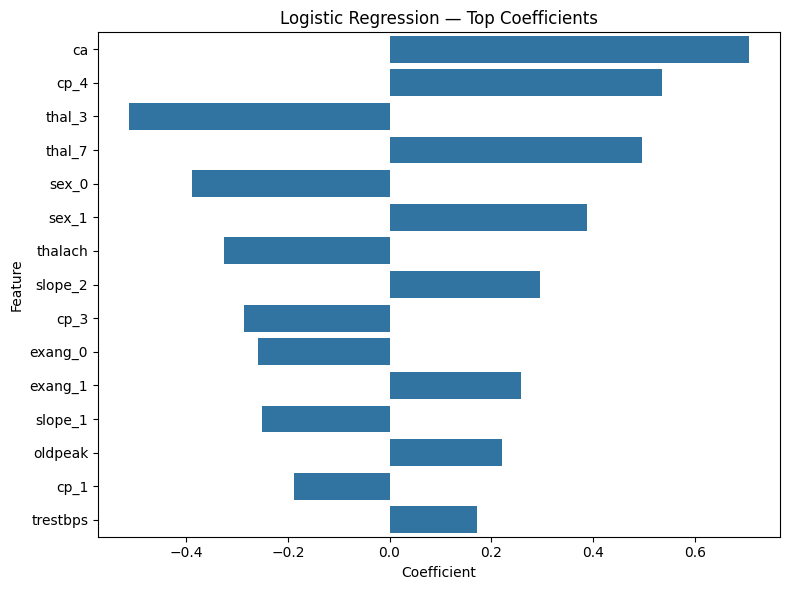


=== Classification report: KNN ===
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.90      0.93      0.91        28

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
# === 0) Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, RocCurveDisplay,
                             classification_report)
from sklearn.utils.class_weight import compute_class_weight

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import joblib

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# === 1) Load data
DATA_PATH = "heart_disease.csv"  # <-- change me
df = pd.read_csv(DATA_PATH)

# If your file has these exact headers, great. If not, rename accordingly.
# Typical Cleveland headers:
expected_cols = [
    "age","sex","cp","trestbps","chol","fbs","restecg","thalach",
    "exang","oldpeak","slope","ca","thal","target"
]
if set(expected_cols).issubset(df.columns):
    df = df[expected_cols]
else:
    print(" Column names differ. Current columns:", df.columns.tolist())

# Optional: quick sanity check
print(df.head())
print(df['target'].value_counts(dropna=False))

# === 2) Light cleaning / imputation (optional)
# Replace '?' with NaN if present, then impute numerics with median and categoricals with mode
df = df.replace('?', np.nan)

# Cast numerics (some cols might be read as object due to '?')
num_cols = ["age","trestbps","chol","thalach","oldpeak","ca"]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Categorical columns (as integers)
cat_cols = ["sex","cp","fbs","restecg","exang","slope","thal"]

# Simple imputation
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode().iloc[0]).astype(int)

# Ensure target is binary int {0,1}
df["target"] = df["target"].astype(int)
df = df[(df["target"]==0) | (df["target"]==1)].copy()

# === 3) Train/test split
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# === 4) Preprocess pipeline
numeric_features = num_cols
categorical_features = cat_cols

preproc = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
    remainder="drop"
)

# === 5) Models + grids
models_and_grids = {
    "LogisticRegression": (
        LogisticRegression(max_iter=500, class_weight="balanced", random_state=RANDOM_STATE),
        {"clf__C": [0.01, 0.1, 1, 10], "clf__penalty": ["l2"], "clf__solver": ["lbfgs"]}
    ),
    "DecisionTree": (
        DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight="balanced"),
        {"clf__max_depth": [3, 5, 7, None], "clf__min_samples_split": [2, 5, 10]}
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=RANDOM_STATE, class_weight="balanced"),
        {"clf__n_estimators": [200, 500],
         "clf__max_depth": [None, 5, 7, 10],
         "clf__min_samples_split": [2, 5]}
    ),
    "SVM": (
        SVC(probability=True, class_weight="balanced", random_state=RANDOM_STATE),
        {"clf__C": [0.1, 1, 10], "clf__kernel": ["rbf", "linear"], "clf__gamma": ["scale", "auto"]}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {"clf__n_neighbors": [3,5,7,9], "clf__weights": ["uniform","distance"]}
    ),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

results = []

best_estimators = {}

# === 6) Train each with GridSearchCV
for name, (estimator, grid) in models_and_grids.items():
    pipe = Pipeline(steps=[("preproc", preproc), ("clf", estimator)])
    gs = GridSearchCV(
        pipe, param_grid=grid, scoring="roc_auc", cv=cv, n_jobs=-1, verbose=0
    )
    gs.fit(X_train, y_train)

    best_estimators[name] = gs.best_estimator_
    y_pred = gs.best_estimator_.predict(X_test)
    y_proba = gs.best_estimator_.predict_proba(X_test)[:, 1]

    row = {
        "Model": name,
        "BestParams": gs.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba),
    }
    results.append(row)

# Collate and sort
res_df = pd.DataFrame(results).sort_values("ROC_AUC", ascending=False).reset_index(drop=True)
print("\n=== Test Set Performance ===")
print(res_df)

# Save results
res_df.to_csv("model_results.csv", index=False)
print("Saved: model_results.csv")

# Optionally save the best model
best_name = res_df.iloc[0]["Model"]
joblib.dump(best_estimators[best_name], f"best_model_{best_name}.joblib")
print(f"Saved best model: best_model_{best_name}.joblib")

# === 7) Confusion matrices
def plot_confmat(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
top3 = res_df["Model"].head(3).tolist()

for ax, name in zip(axes, top3):
    est = best_estimators[name]
    y_pred = est.predict(X_test)
    plot_confmat(ax, y_test, y_pred, f"{name} — Confusion Matrix")

plt.tight_layout()
plt.show()

# === 8) ROC curves (overlay)
plt.figure(figsize=(8,6))
for name in top3:
    est = best_estimators[name]
    RocCurveDisplay.from_estimator(est, X_test, y_test, name=name)
plt.plot([0,1],[0,1], "k--", linewidth=1)
plt.title("ROC Curves (Top 3 Models)")
plt.tight_layout()
plt.show()

# === 9) Optional: Feature importance (for RF + LR)
# Random Forest feature importance (after one-hot): need to pull feature names from ColumnTransformer
def get_feature_names(preprocessor):
    # Numeric names:
    num_feats = preprocessor.named_transformers_['num'].feature_names_in_.tolist()
    # Categorical one-hot names:
    ohe = preprocessor.named_transformers_['cat']
    cat_input_feats = ohe.feature_names_in_.tolist()
    cat_ohe_feats = ohe.get_feature_names_out(cat_input_feats).tolist()
    return num_feats + cat_ohe_feats

feat_names = get_feature_names(best_estimators["RandomForest"].named_steps["preproc"])

# RF importances
rf = best_estimators["RandomForest"].named_steps["clf"]
rf_imp = pd.Series(rf.feature_importances_, index=feat_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
sns.barplot(x=rf_imp.values, y=rf_imp.index)
plt.title("Random Forest — Top Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Logistic coefficients
if "LogisticRegression" in best_estimators:
    lr = best_estimators["LogisticRegression"].named_steps["clf"]
    coefs = pd.Series(lr.coef_[0], index=feat_names).sort_values(key=abs, ascending=False)[:15]

    plt.figure(figsize=(8,6))
    sns.barplot(x=coefs.values, y=coefs.index)
    plt.title("Logistic Regression — Top Coefficients")
    plt.xlabel("Coefficient")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# === 10) Pretty classification report for the best model
best = best_estimators[best_name]
print(f"\n=== Classification report: {best_name} ===")
print(classification_report(y_test, best.predict(X_test)))


/tmp/ipython-input-2804910466.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


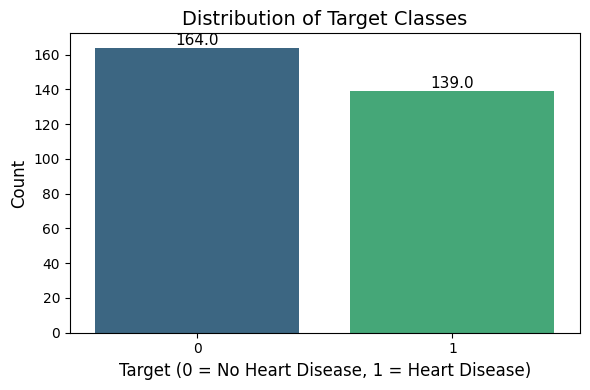

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("heart_disease.csv")  # Replace with your file name

# Plot target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='viridis')

# Add labels and title
plt.title('Distribution of Target Classes', fontsize=14)
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show count values above bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


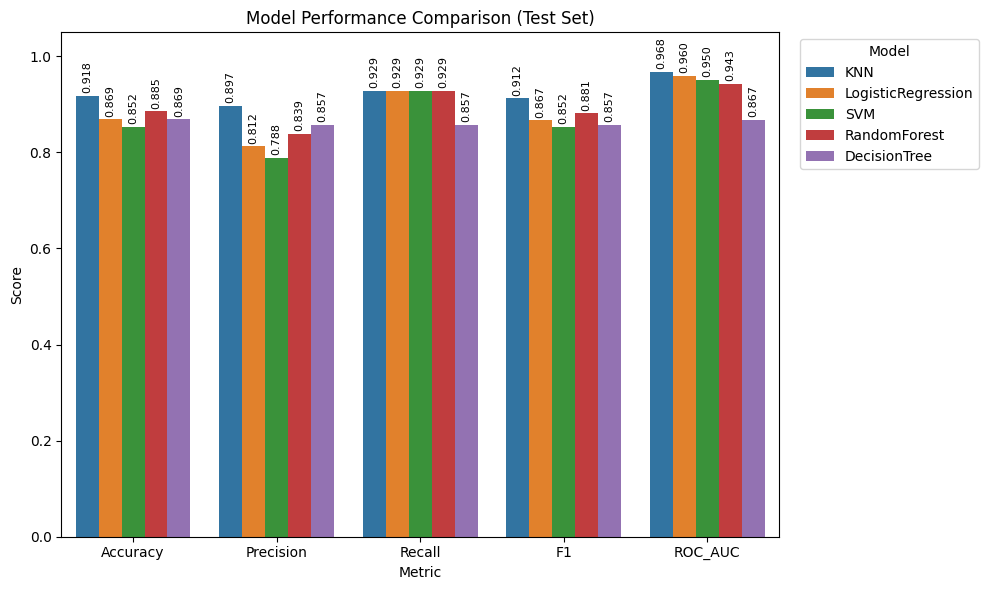

In [ ]:
# === A) Grouped bar chart of metrics across models ===
plot_cols = ["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"]

melted = (
    res_df[["Model"] + plot_cols]
    .melt(id_vars="Model", var_name="Metric", value_name="Score")
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted, x="Metric", y="Score", hue="Model")
ax.set_ylim(0, 1.05)
ax.set_title("Model Performance Comparison (Test Set)")
ax.bar_label(ax.containers[0], fmt="%.3f", padding=2, fontsize=8, rotation=90)
for c in ax.containers[1:]:
    ax.bar_label(c, fmt="%.3f", padding=2, fontsize=8, rotation=90)
plt.legend(title="Model", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


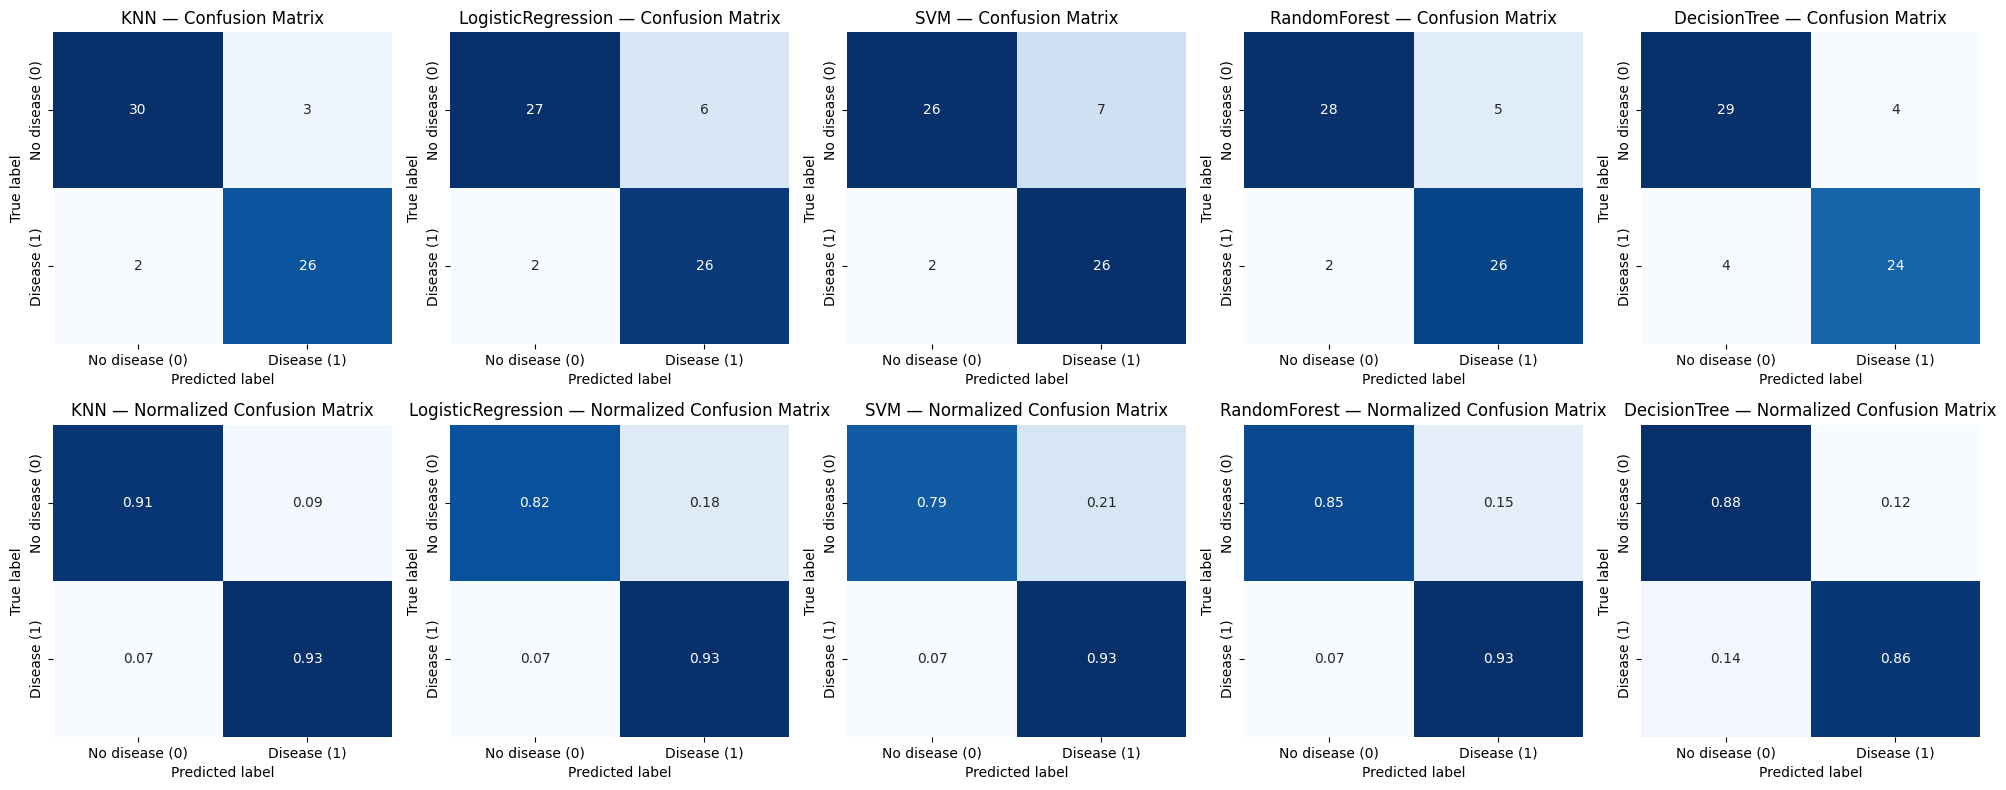

In [ ]:
# === B) Confusion matrices for all models (counts + normalized) ===
def plot_confmat(ax, y_true, y_pred, title, normalize=False):
    cm = confusion_matrix(y_true, y_pred, normalize=("true" if normalize else None))
    fmt = ".2f" if normalize else "d"
    sns.heatmap(cm, annot=True, fmt=fmt, cmap="Blues", cbar=False, ax=ax,
                xticklabels=["No disease (0)", "Disease (1)"],
                yticklabels=["No disease (0)", "Disease (1)"])
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_title(title)

model_order = res_df["Model"].tolist()  # in performance order

n = len(model_order)
fig, axes = plt.subplots(nrows=2, ncols=n, figsize=(4*n, 8))
if n == 1:
    axes = np.array([[axes[0]], [axes[1]]])  # keep indexing consistent

for j, name in enumerate(model_order):
    est = best_estimators[name]
    y_pred = est.predict(X_test)
    # Counts
    plot_confmat(axes[0, j], y_test, y_pred, f"{name} — Confusion Matrix", normalize=False)
    # Normalized by true class
    plot_confmat(axes[1, j], y_test, y_pred, f"{name} — Normalized Confusion Matrix", normalize=True)

plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

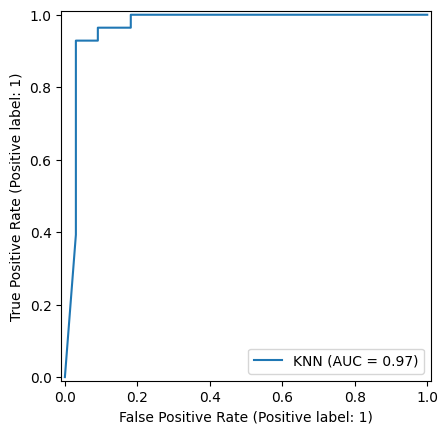

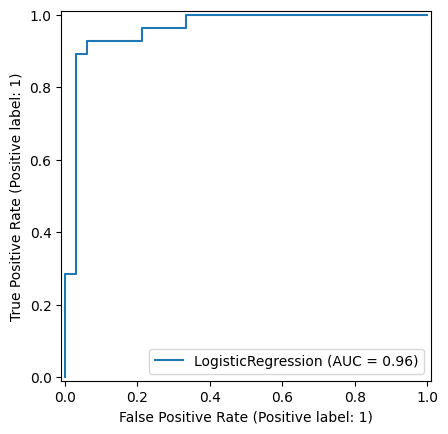

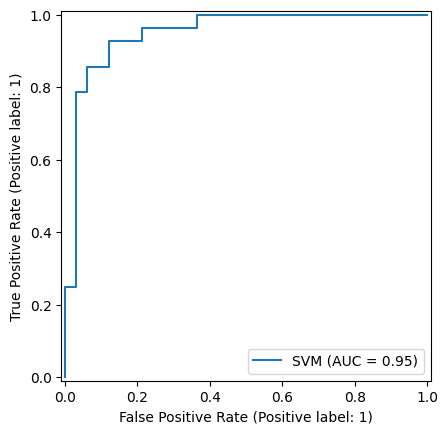

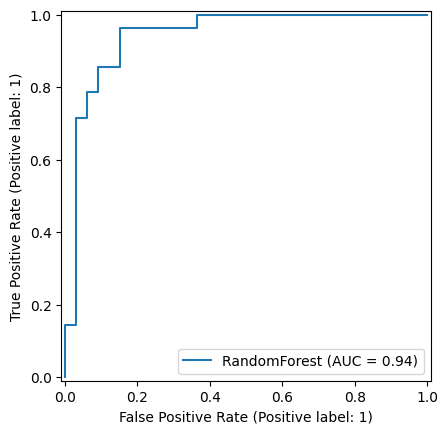

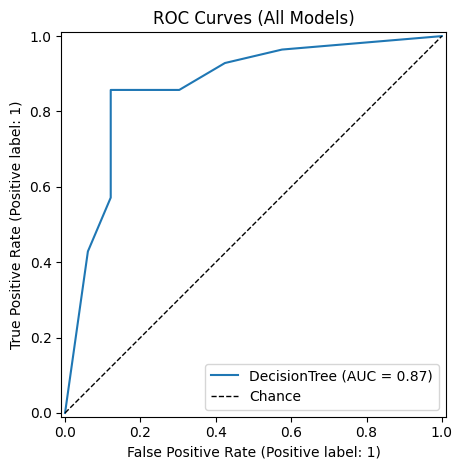

In [ ]:
# === C) ROC curves for all models on one plot ===
plt.figure(figsize=(8, 6))
for name in res_df["Model"]:
    est = best_estimators[name]
    RocCurveDisplay.from_estimator(est, X_test, y_test, name=name)

plt.plot([0, 1], [0, 1], "k--", linewidth=1, label="Chance")
plt.title("ROC Curves (All Models)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

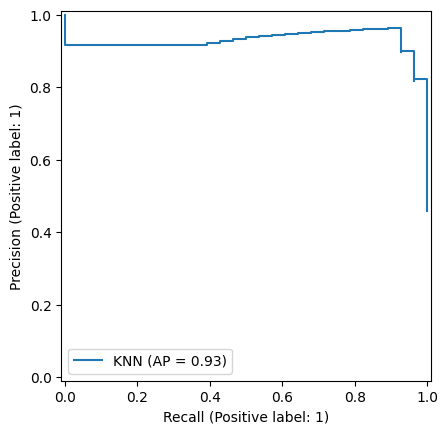

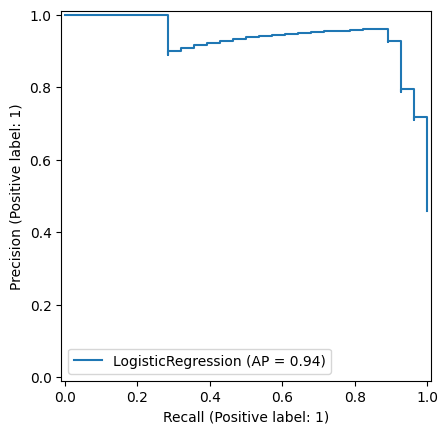

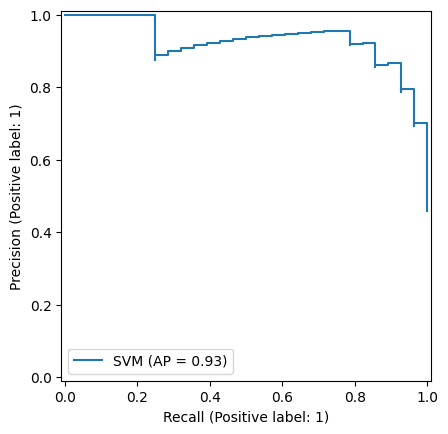

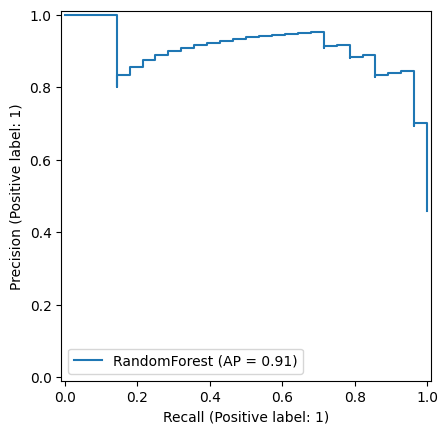

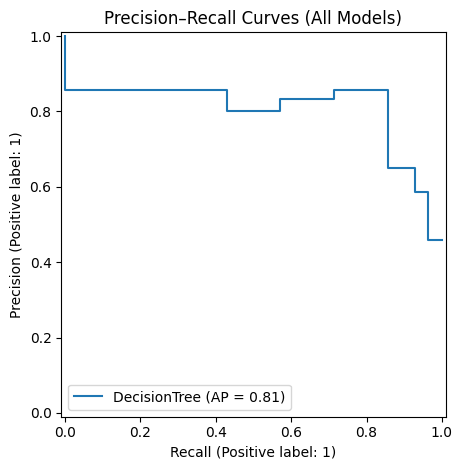

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(8, 6))
for name in res_df["Model"]:
    est = best_estimators[name]
    PrecisionRecallDisplay.from_estimator(est, X_test, y_test, name=name)

plt.title("Precision–Recall Curves (All Models)")
plt.tight_layout()
plt.show()


In [ ]:
def get_feature_names_from_preproc(preproc):
    # Numeric names
    num = preproc.named_transformers_["num"]
    num_names = num.feature_names_in_.tolist()

    # One-hot encoded categorical names
    ohe = preproc.named_transformers_["cat"]
    cat_in = ohe.feature_names_in_.tolist()
    cat_names = ohe.get_feature_names_out(cat_in).tolist()

    return num_names + cat_names


In [ ]:
feat_names = get_feature_names_from_preproc(
    best_estimators["RandomForest"].named_steps["preproc"]
)


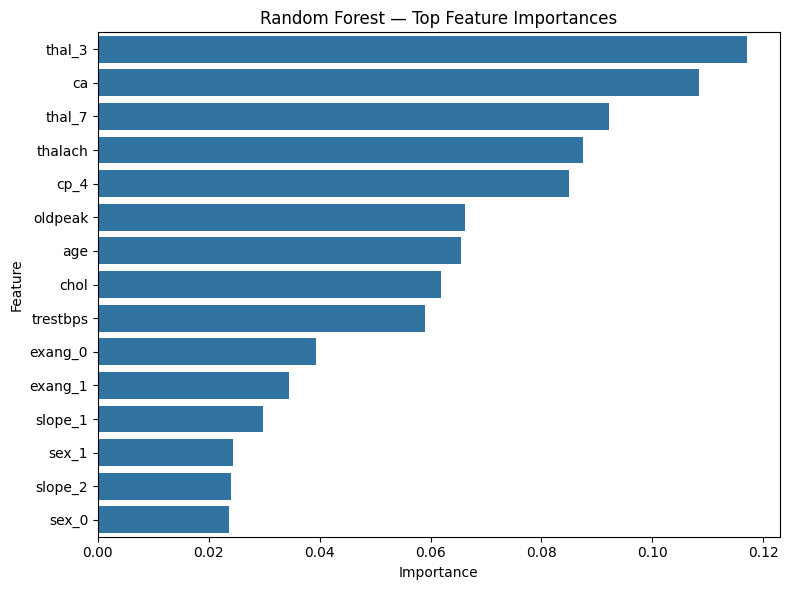

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rf_pipe = best_estimators["RandomForest"]
rf_clf  = rf_pipe.named_steps["clf"]

rf_importances = pd.Series(rf_clf.feature_importances_, index=feat_names)\
                   .sort_values(ascending=False)

top_n = 15
plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances.head(top_n).values, y=rf_importances.head(top_n).index)
plt.title("Random Forest — Top Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Optional: save to CSV
rf_importances.to_csv("rf_feature_importances.csv", header=["importance"])


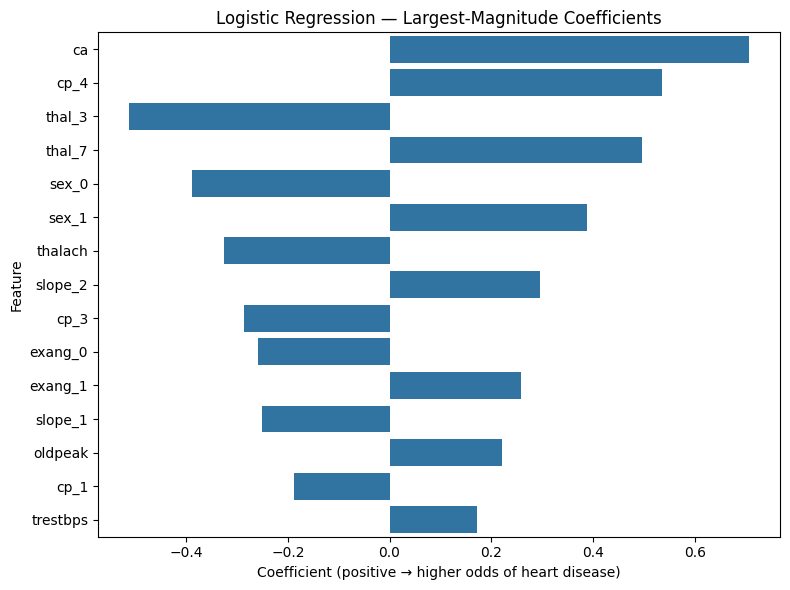

In [ ]:
if "LogisticRegression" in best_estimators:
    lr_pipe = best_estimators["LogisticRegression"]
    lr_clf  = lr_pipe.named_steps["clf"]

    # Coefficients align with the transformed feature order
    lr_coefs = pd.Series(lr_clf.coef_[0], index=feat_names)
    lr_abs   = lr_coefs.abs().sort_values(ascending=False)

    top_n = 15
    plt.figure(figsize=(8,6))
    sns.barplot(x=lr_coefs.loc[lr_abs.index[:top_n]].values,
                y=lr_coefs.loc[lr_abs.index[:top_n]].index)
    plt.title("Logistic Regression — Largest-Magnitude Coefficients")
    plt.xlabel("Coefficient (positive → higher odds of heart disease)")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    # Optional: save to CSV
    lr_coefs.to_csv("lr_coefficients.csv", header=["coef"])


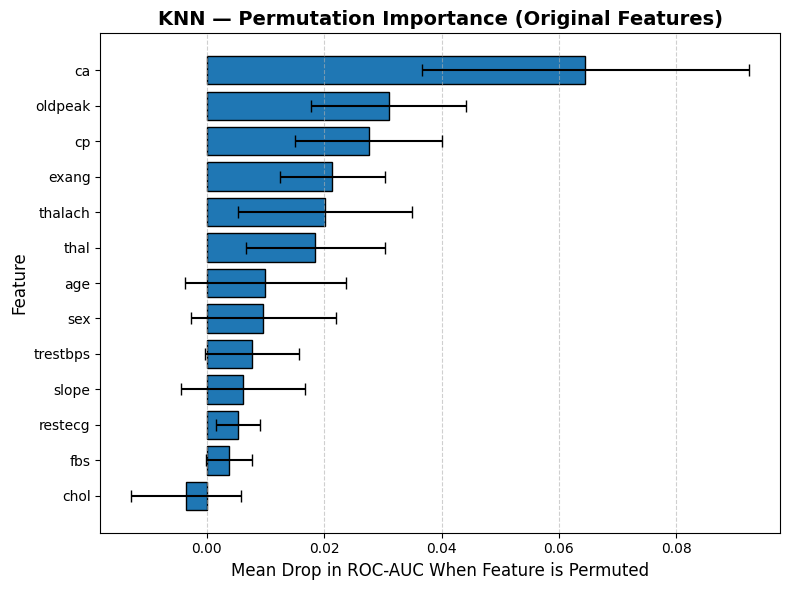

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by mean importance and reverse for top-to-bottom ordering
plot_df = perm_df.sort_values("mean_importance", ascending=True)

plt.figure(figsize=(8, 6))
bars = plt.barh(
    plot_df["feature"].values,
    plot_df["mean_importance"].values,
    xerr=plot_df["std_importance"].values,
    align="center",
    color="#1f77b4",  # softer blue
    edgecolor="black",
    capsize=4
)

# Add gridlines for readability
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Labels & title
plt.xlabel("Mean Drop in ROC-AUC When Feature is Permuted", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("KNN — Permutation Importance (Original Features)", fontsize=14, weight="bold")

# Tighter y-axis spacing
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Tight layout
plt.tight_layout()
plt.show()
